# Machine Learning Classification

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from patsy import dmatrices
import sklearn.metrics as confusion_matrics
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#set the defult figure size
matplotlib.rcParams['figure.figsize']=[10.0,6.0]
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
#Get version information
print(sys.version)
print("Pandas version:{0}".format(pd.__version__))
print("Matplotlib version:{0}".format(matplotlib.__version__))
print("Numpy version:{0}".format(np.__version__))
print("SciKitlearn version:{0}".format(sklearn.__version__))

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version:0.23.4
Matplotlib version:3.0.2
Numpy version:1.15.4
SciKitlearn version:0.20.1


In [4]:
import os
print("My working director:\n" + os.getcwd())
os.chdir(r"/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week 11")
print("My working director:\n" + os.getcwd())

My working director:
/Users/wenhuizeng/High Performance
My working director:
/Users/wenhuizeng/Library/Mobile Documents/com~apple~CloudDocs/high performance/week 11


In [5]:
pd.options.display.max_rows=10
df = pd.read_csv(r"PatientAnalyticFile.csv")

### Example One
It just means raw string in Python. Meaning that whatever is inside the string, is the string. For example, if you wanted to add slashes:

string1 = "happy\/cheese"
You would need to add \ in front of the slash since its an escaping character. For example, \n means a new line.

If you keep the string raw, it makes sure that whatever is in the string is not interpreted a special way. for example if you wrote string2 = r"\n", it would just give you "\n" as you string, and not a new line.


### Example Two
The r'..' string modifier causes the '..' string to be interpreted literally. That means, r'My\Path\Without\Escaping' will evaluate to 'My\Path\Without\Escaping' - without causing the backslash to escape characters. The prior is equivalent to 'My\\Path\\Without\\Escaping' string, but without the raw modifier.

Make the outcome variable depend on the if the death date is missing

In [6]:
df.head()

,PatientID,DateOfBirth,Gender,Race,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,Stroke,Dementia,Pulmonary,...,Metastatic_solid_tumour,HIV,Obesity,Depression,Hypertension,Drugs,Alcohol,First_Appointment_Date,Last_Appointment_Date,DateOfDeath
0,1,1962-02-27,female,hispanic,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2013-04-27,2018-06-01,NaN
1,2,1959-08-18,male,white,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2005-11-30,2008-11-02,2008-11-02
2,3,1946-02-15,female,white,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2011-11-05,2015-11-13,NaN
3,4,1979-07-27,female,white,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2010-03-01,2016-01-17,2016-01-17
4,5,1983-02-19,female,hispanic,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2006-09-22,2018-06-01,NaN


In [7]:
df['death']=np.where(df['DateOfDeath'].isnull(),0,1)
df['death'].describe()
df.dtypes
df.columns

count    20000.000000
mean         0.354700
std          0.478434
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: death, dtype: float64

PatientID                  int64
DateOfBirth               object
Gender                    object
Race                      object
Myocardial_infarction      int64
                           ...  
Alcohol                    int64
First_Appointment_Date    object
Last_Appointment_Date     object
DateOfDeath               object
death                      int64
Length: 30, dtype: object

Index(['PatientID', 'DateOfBirth', 'Gender', 'Race', 'Myocardial_infarction',
       'Congestive_heart_failure', 'Peripheral_vascular_disease', 'Stroke',
       'Dementia', 'Pulmonary', 'Rheumatic', 'Peptic_ulcer_disease',
       'LiverMild', 'Diabetes_without_complications',
       'Diabetes_with_complications', 'Paralysis', 'Renal', 'Cancer',
       'LiverSevere', 'Metastatic_solid_tumour', 'HIV', 'Obesity',
       'Depression', 'Hypertension', 'Drugs', 'Alcohol',
       'First_Appointment_Date', 'Last_Appointment_Date', 'DateOfDeath',
       'death'],
      dtype='object')

# Convert Date of birth to date

In [8]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])
df['Age_years'] = (pd.to_datetime('2019-03-30')-df['DateOfBirth']).dt.days/365
df['Age_years']

0        57.123288
1        59.654795
2        73.167123
3        39.701370
4        36.131507
           ...    
19995    21.290411
19996    35.019178
19997    25.753425
19998    34.972603
19999    52.912329
Name: Age_years, Length: 20000, dtype: float64

# Datetime Convert
https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html

## Workflow into scikit-learn


* There are a number of possible ways to prepare data for modeling in scikit-learn. 
* You must end up with a numeric ndarray of inputs (X) and a numeric ndarray matrix of the target (Y)
* I prefer the following workflow:
  * We use pandas to import and clean data
  * We use Patsy to create the X and Y ndarrays
  * Using categorical transformations (dummy coding) as needed
  * Also can generate non-linear terms including splines
  * Use scikit-learn for machine learning

In [9]:
vars_remove = ['PatientID','First_Appointment_Date','DateOfBirth',
               'Last_Appointment_Date','DateOfDeath','death']
df_vars = set(df.columns)-set(vars_remove)

In [10]:
"+".join(df_vars)

'Age_years+Drugs+HIV+Rheumatic+Dementia+Stroke+Diabetes_without_complications+Race+Metastatic_solid_tumour+Hypertension+Obesity+Alcohol+Cancer+Gender+Myocardial_infarction+Pulmonary+Peptic_ulcer_disease+Congestive_heart_failure+Paralysis+Renal+LiverSevere+Peripheral_vascular_disease+Depression+Diabetes_with_complications+LiverMild'

In [11]:
formula = "death ~ " + "+".join(df_vars)

In [12]:
formula

'death ~ Age_years+Drugs+HIV+Rheumatic+Dementia+Stroke+Diabetes_without_complications+Race+Metastatic_solid_tumour+Hypertension+Obesity+Alcohol+Cancer+Gender+Myocardial_infarction+Pulmonary+Peptic_ulcer_disease+Congestive_heart_failure+Paralysis+Renal+LiverSevere+Peripheral_vascular_disease+Depression+Diabetes_with_complications+LiverMild'

In [13]:
df_sample = df.sample(frac=0.1,random_state=12)

In [14]:
df_sample.shape

(2000, 31)

In [15]:
Y,X = dmatrices(formula,df)

In [16]:
Y #Y is two dimension which is not appropriate 

DesignMatrix with shape (20000, 1)
  death
      0
      1
      0
      1
      0
      0
      0
      0
      0
      0
      0
      0
      1
      0
      0
      0
      1
      1
      0
      0
      1
      1
      0
      0
      0
      0
      0
      0
      0
      0
  [19970 rows omitted]
  Terms:
    'death' (column 0)
  (to view full data, use np.asarray(this_obj))

In [17]:
X

DesignMatrix with shape (20000, 28)
  Columns:
    ['Intercept',
     'Race[T.hispanic]',
     'Race[T.other]',
     'Race[T.white]',
     'Gender[T.male]',
     'Age_years',
     'Drugs',
     'HIV',
     'Rheumatic',
     'Dementia',
     'Stroke',
     'Diabetes_without_complications',
     'Metastatic_solid_tumour',
     'Hypertension',
     'Obesity',
     'Alcohol',
     'Cancer',
     'Myocardial_infarction',
     'Pulmonary',
     'Peptic_ulcer_disease',
     'Congestive_heart_failure',
     'Paralysis',
     'Renal',
     'LiverSevere',
     'Peripheral_vascular_disease',
     'Depression',
     'Diabetes_with_complications',
     'LiverMild']
  Terms:
    'Intercept' (column 0)
    'Race' (columns 1:4)
    'Gender' (column 4)
    'Age_years' (column 5)
    'Drugs' (column 6)
    'HIV' (column 7)
    'Rheumatic' (column 8)
    'Dementia' (column 9)
    'Stroke' (column 10)
    'Diabetes_without_complications' (column 11)
    'Metastatic_solid_tumour' (column 12)
    'Hypertens

In [18]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y, test_y = train_test_split(X,np.ravel(Y),test_size=0.25,random_state=42) 

In [19]:
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(15000, 28)

(5000, 28)

(15000,)

(5000,)

In [20]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(fit_intercept=True, solver="liblinear")
clf.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Only give the label instead of the probability

In [21]:
clf.predict(test_x)

array([0., 1., 0., ..., 0., 0., 1.])

In [22]:
clf.predict_proba(test_x)

array([[0.60002413, 0.39997587],
       [0.26947044, 0.73052956],
       [0.65423155, 0.34576845],
       ...,
       [0.90163893, 0.09836107],
       [0.52429071, 0.47570929],
       [0.35281731, 0.64718269]])

# Modeal Summary

In [23]:
clf.coef_
clf.coef_.shape

array([[-2.24531854, -0.08285701, -0.08075652, -0.00416424,  0.02744372,
         0.06443963,  0.31587156,  0.09847563, -0.31442877,  0.00631357,
        -0.09646615, -0.0223541 ,  0.01333068, -0.03484709,  0.30760852,
         0.76654827,  0.62150486,  0.78829731,  0.63714396,  0.01293294,
         0.48604875,  0.14773417, -0.09719593,  0.98169093,  1.06505109,
         0.51474443,  0.11715913,  0.08351838]])

(1, 28)

# Get the mean score estimation

In [24]:
clf.score(train_x,train_y)

array(0.74793333)

# The mean baseline model is 75% accuracy

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_y,clf.predict(train_x))

array([[8217, 1496],
       [2285, 3002]])

In [26]:
print(sklearn.metrics.classification_report(train_y,clf.predict(train_x)))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      9713
         1.0       0.67      0.57      0.61      5287

   micro avg       0.75      0.75      0.75     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.74      0.75      0.74     15000



In [27]:
sklearn.metrics.accuracy_score(train_y,clf.predict(train_x))
sklearn.metrics.f1_score(train_y,clf.predict(train_x))
sklearn.metrics.recall_score(train_y,clf.predict(train_x))
pred_prob = clf.predict_proba(train_x)[:,1]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train_y,pred_prob,pos_label=1)
roc_auc = sklearn.metrics.auc(fpr, tpr)
roc_auc

array(0.74793333)

0.6135922330097088

0.5678078305277094

0.7968749449273592

# ROC curve 
https://www.cnblogs.com/wzyuan/p/9440017.html

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate or (1 - Specifity)')

Text(0, 0.5, 'True Positive Rate or (Sensitivity)')

Text(0.5, 1.0, 'Receiver Operating Curve')

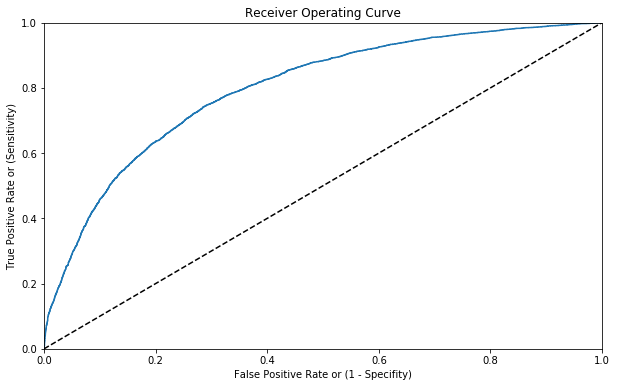

In [28]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Curve')

# Kappa score

In [29]:
sklearn.metrics.cohen_kappa_score(train_y,clf.predict(train_x))

0.4283519760909109

# sklearn learn metrics command
https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

# Keep track of the model score

In [30]:
model_result = {}
model_result['logistic']=(sklearn.metrics.accuracy_score(train_y,clf.predict(train_x)),
                         sklearn.metrics.accuracy_score(test_y,clf.predict(test_x)))

In [31]:
def get_result(x1):
    print("\n{0:20}   {1:4}   {2:4}".format('Model','Train','Test'))
    print('-----------------------------')
    for i in x1.keys():
        print('{0:20}  {1:<6.4}   {2:<6.3}'.format(i,x1[i][0],x1[i][1]))
        

In [32]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  


In [33]:
## Null information rate
1-train_y.mean()

array(0.64753333)

# Dummy Classifier

In [34]:
from sklearn.dummy import DummyClassifier
null_clf = DummyClassifier(strategy='most_frequent',random_state=0)
null_clf.fit(train_x,train_y)
clf.score(train_x,train_y)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

array(0.74793333)

In [35]:
model_result['Null']=(sklearn.metrics.accuracy_score(train_y,null_clf.predict(train_x)),
                      sklearn.metrics.accuracy_score(test_y,null_clf.predict(test_y)))

In [36]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 


# Logistic Regression with L1 Penalty

In [37]:
clf_L1_logistic = linear_model.LogisticRegression(penalty='l1',C=1,solver='liblinear')
clf_L1_logistic.fit(train_x,train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
confusion_matrix(train_y,clf_L1_logistic.predict(train_x))

array([[8216, 1497],
       [2281, 3006]])

In [39]:
model_result['Logistic_L1_C1']=(sklearn.metrics.accuracy_score(train_y,clf_L1_logistic.predict(train_x)),
                               sklearn.metrics.accuracy_score(test_y,clf_L1_logistic.predict(test_x)))

In [40]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 


In [41]:
clf_L1_C10 = linear_model.LogisticRegression(penalty='l1',C=10,solver='liblinear')
clf_L1_C10.fit(train_x,train_y)
model_result['Logistic_L1_C10']=(sklearn.metrics.accuracy_score(train_y,clf_L1_C10.predict(train_x)),
                               sklearn.metrics.accuracy_score(test_y,clf_L1_C10.predict(test_x)))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  


In [43]:
clf_L1_C01 = linear_model.LogisticRegression(penalty='l1',C=0.01,solver='liblinear')
clf_L1_C01.fit(train_x,train_y)
model_result['Logistic_L1_C01']=(sklearn.metrics.accuracy_score(train_y,clf_L1_C01.predict(train_x)),
                                 sklearn.metrics.accuracy_score(test_y,clf_L1_C01.predict(test_x)))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 


In [45]:
clf_cv = linear_model.LogisticRegressionCV(cv=5,Cs=20,penalty='l1',solver='liblinear')
clf_cv.fit(train_x,train_y)

LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [46]:
## how many C's were fit?
clf_cv.Cs
## which C's were fit?
clf_cv.Cs_
## Which C was 'best'? 
clf_cv.C_

20

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

array([0.08858668])

In [47]:
model_result['logistic_L1_C1_auto']=(sklearn.metrics.accuracy_score(train_y,clf_cv.predict(train_x)),
                                 sklearn.metrics.accuracy_score(test_y,clf_cv.predict(test_x)))

In [48]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 
logistic_L1_C1_auto   0.7474   0.74  


### The L1 not improve the model accuracy, it indicates the original model is not overfitting

## Scaling and Pipeline

In [49]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
scaler = preprocessing.StandardScaler()
clf = linear_model.LogisticRegressionCV(cv =5, Cs=20,penalty='l1',solver='liblinear')
pipe1 = Pipeline([("scale",scaler),
                ('Lasso',clf)])
pipe1.fit(train_x,train_y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Lasso', LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0))])

In [50]:
pipe1.named_steps

{'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'Lasso': LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
            multi_class='warn', n_jobs=None, penalty='l1',
            random_state=None, refit=True, scoring=None, solver='liblinear',
            tol=0.0001, verbose=0)}

In [51]:
pipe1.named_steps['Lasso'].C_

array([0.03359818])

In [52]:
model_result['logistic_scale_L1_auto']=(sklearn.metrics.accuracy_score(train_y,pipe1.predict(train_x)),
                                 sklearn.metrics.accuracy_score(test_y,pipe1.predict(test_x)))

In [53]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 
logistic_L1_C1_auto   0.7474   0.74  
logistic_scale_L1_auto  0.748    0.74  


In [54]:
from sklearn.preprocessing import PolynomialFeatures
scaler = preprocessing.StandardScaler()
poly_feat = PolynomialFeatures(degree=2,include_bias=False)
clf = linear_model.LogisticRegressionCV(cv=5,Cs=20,solver='liblinear',penalty='l1')
pipe2=Pipeline([('scale',scaler),
               ('poly',poly_feat),
               ('Lasso',clf)])

In [ ]:
#pipe2.fit(train_x,train_y)

In [ ]:
#result_scores['LogisticL1_poly'] = \
             #(sklearn.metrics.accuracy_score(train_x,pipe2.predict(train_x)),
              #sklearn.metrics.accuracy_score(test_y,pipe2.predict(test_x)))
#get_results(result_scores)

# Random Forest

## Hyperparameter Tuning
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [57]:
### Fit Random Forest
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(n_estimators=100,max_features=10,random_state=42)
clf_rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [58]:
confusion_matrix(train_y,clf_rf.predict(train_x))

array([[9706,    7],
       [  15, 5272]])

In [62]:
model_result['Random_noCV']=(sklearn.metrics.accuracy_score(train_y,clf_rf.predict(train_x)),
                          sklearn.metrics.accuracy_score(test_y,clf_rf.predict(test_x)))

In [63]:
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 
logistic_L1_C1_auto   0.7474   0.74  
logistic_scale_L1_auto  0.748    0.74  
Random_CV             0.9985   0.68  
Random_noCV           0.9985   0.68  


In [66]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(50,100,200,300),
             'max_features':(5,10,15,20)}
rf_model = ensemble.RandomForestClassifier(random_state=32)
clf_cv = GridSearchCV(rf_model, parameters,cv=5,return_train_score=True)
clf_cv.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=32, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (50, 100, 200, 300), 'max_features': (5, 10, 15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
clf_cv.best_params_
clf_cv.cv_results_

{'max_features': 20, 'n_estimators': 300}

{'mean_fit_time': array([0.55026813, 1.06935678, 2.20060601, 3.34780483, 0.75936751,
        1.50453725, 3.00374465, 4.55585771, 0.98908591, 1.89151421,
        3.785078  , 5.70253325, 1.19800396, 2.33351831, 4.60136647,
        7.06182265]),
 'std_fit_time': array([0.0629803 , 0.05153412, 0.06584268, 0.02702886, 0.0134784 ,
        0.03999663, 0.02993743, 0.07201751, 0.02984625, 0.02232912,
        0.0939331 , 0.11353175, 0.04622178, 0.06214685, 0.05124768,
        0.13383101]),
 'mean_score_time': array([0.03330989, 0.06990371, 0.13542528, 0.20525274, 0.03354897,
        0.07324839, 0.14819546, 0.2257216 , 0.03915286, 0.06808977,
        0.14612751, 0.22358274, 0.03416076, 0.06562228, 0.13488393,
        0.20481572]),
 'std_score_time': array([0.00027678, 0.00447785, 0.00803228, 0.01268782, 0.00079806,
        0.00239143, 0.00794403, 0.01672283, 0.00765719, 0.00053227,
        0.01533163, 0.02523798, 0.00254054, 0.00049978, 0.00119064,
        0.00430298]),
 'param_max_features': mas

In [70]:
## add model score
## Score the Model on Training and Testing Set
model_result['RandomForest_CV'] = \
            (sklearn.metrics.accuracy_score(train_y,clf_cv.predict(train_x)),
             sklearn.metrics.accuracy_score(test_y,clf_cv.predict(test_x)))
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 
logistic_L1_C1_auto   0.7474   0.74  
logistic_scale_L1_auto  0.748    0.74  
Random_CV             0.9985   0.68  
Random_noCV           0.9985   0.68  
RandomForest_CV       0.9985   0.688 


In [71]:
from sklearn.model_selection import GridSearchCV
## specify grid
parameters2 = {'max_depth':(2,5,7,10,20)}
## specify model without hyperparameters
rf_model = ensemble.RandomForestClassifier(max_features=20,
                                           n_estimators=100,
                                           random_state=32)
## specify search with model
clf = GridSearchCV(rf_model,
                   parameters2,
                   cv=5,
                   return_train_score=True)
clf.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=32, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': (2, 5, 7, 10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
model_result['RandomForest_CV2'] = \
            (sklearn.metrics.accuracy_score(train_y,clf_cv.predict(train_x)),
             sklearn.metrics.accuracy_score(test_y,clf_cv.predict(test_x)))
get_result(model_result)


Model                  Train   Test
-----------------------------
logistic              0.7479   0.74  
Null                  0.6475   0.639 
Logistic_L1_C1        0.7481   0.739 
Logistic_L1_C10       0.7477   0.74  
Logistic_L1_C01       0.7349   0.727 
logistic_L1_C1_auto   0.7474   0.74  
logistic_scale_L1_auto  0.748    0.74  
Random_CV             0.9985   0.68  
Random_noCV           0.9985   0.68  
RandomForest_CV       0.9985   0.688 
RandomForest_CV2      0.9985   0.688 
